## CHSH Inequality 

### CHSH Game Problem Statement
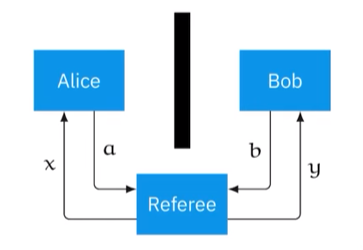

**Inequality :** $...$
1. $x,y,a,b \in \{0,1\}$
2. Question $x,y$ are chosen **Uniformly at random**
3. A Paire of answer $(a,b)$ wins for $(x,y)$ if and only if $a\oplus b = x \land y$

|$(x,y)$|**Condition**|
|-----|---------|
| $(0,0)$ |$a=b$|
| $(0,1)$ |$a=b$|
| $(1,0)$ |$a=b$|
| $(1,1)$ |$a \neq b$|



In [6]:
import qiskit as qk 
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from qiskit import Aer 
Aer.backends()
qasm_sim = Aer.get_backend("qasm_simulator")
sv_sim = Aer.get_backend("statevector_simulator")
aer_sim = Aer.get_backend("aer_simulator")

In [8]:
## Preparing Phase andUnitary Gate  
A_0  = 0
A_1 = np.pi/4
B_0 = np.pi/8
B_1 = -np.pi/8 

In [17]:
## Alicee and bob
alice = qk.QuantumRegister(1,name="Alice")
bob = qk.QuantumRegister(1,name="Bob")
referee_x = qk.QuantumRegister(1,name="Referee_X") 
referee_y = qk.QuantumRegister(1,name="Referee_Y") 
m_alice = qk.ClassicalRegister(1, name="Alice_measure")
m_bob = qk.ClassicalRegister(1, name="Bob_measure")
input_x = qk.ClassicalRegister(1, name= "Input_X")
input_y = qk.ClassicalRegister(1, name= "Input_Y")
 

d:\AritrA\QC\.qc\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


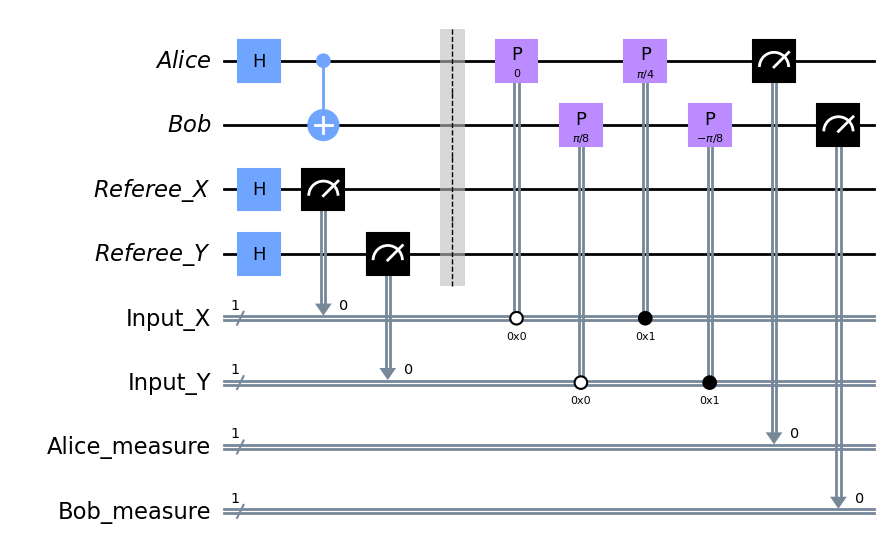

In [24]:
CHSH_circuit = qk.QuantumCircuit(alice, bob, referee_x, referee_y, input_x, input_y, m_alice, m_bob)
CHSH_circuit.h(alice)
CHSH_circuit.cx(alice,bob)
CHSH_circuit.h(referee_x)
CHSH_circuit.measure(referee_x,input_x)
CHSH_circuit.h(referee_y)
CHSH_circuit.measure(referee_y,input_y)
CHSH_circuit.barrier()

## Stratagy begins 

CHSH_circuit.p(A_0,alice).c_if(input_x,0)
CHSH_circuit.p(A_1,alice).c_if(input_x,1)
CHSH_circuit.p(B_0,bob).c_if(input_y,0)
CHSH_circuit.p(B_1,bob).c_if(input_y,1)

CHSH_circuit.measure([alice[0],bob[0]],[m_alice[0],m_bob[0]])

CHSH_circuit.draw('mpl')


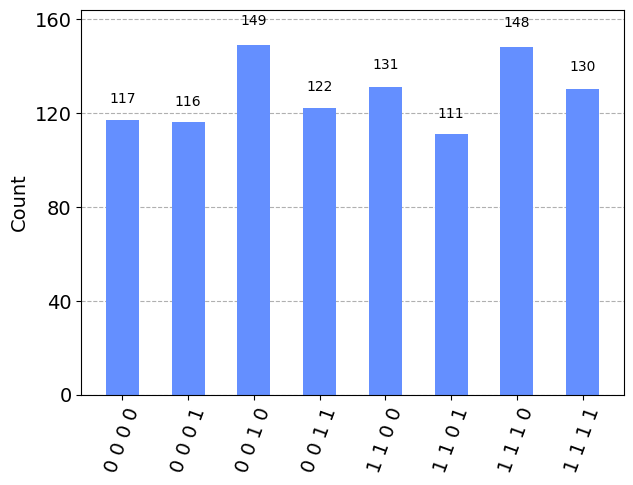

In [25]:
result = qasm_sim.run(CHSH_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [27]:
counts

{'1 1 1 0': 148,
 '1 1 0 1': 111,
 '0 0 1 1': 122,
 '1 1 0 0': 131,
 '1 1 1 1': 130,
 '0 0 0 1': 116,
 '0 0 0 0': 117,
 '0 0 1 0': 149}